# Regression

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("notebook", font_scale=1.4)
sns.set_style("whitegrid")
from IPython.core.display import HTML
css_file = '../../my.css'
HTML(open(css_file, "r").read())

Tracking Parkinson's disease symptom progression often uses the unified Parkinson's disease rating scale (UPDRS) that requires the patient's presence in clinic, and time-consuming physical examinations by trained medical staff. Thus, symptom monitoring is costly and logistically inconvenient for patient and clinical staff alike, also hindering recruitment for future large-scale clinical trials. 

In 2010 a data set was published [1] that was composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes. 


> [1] A. Tsanas, M. A. Little, P. E. McSharry, L. O. Ramig (2009),
*Accurate telemonitoring of Parkinson.s disease progression by non-invasive 
speech tests*,
IEEE Transactions on Biomedical Engineering, 2010 Apr;57(4):884-93.

Let's see if we can create an acuurate predictor of UPDRS. Load the data set, the file is called "parkinsons_updrs.csv".

In [43]:
#solution!!
data = pd.read_csv("parkinsons_updrs.csv")

What is the shape of the data set.

In [44]:
#solution!!
data.shape

(5875, 20)

The target column for the regression analysis is 'motor_UPDRS'. To plot the distribution of one column in the pandas DataFrame we can use a boxplot as follows:

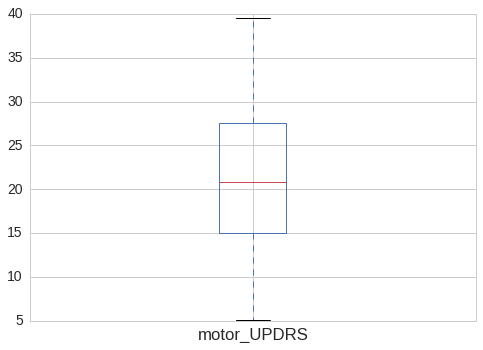

In [45]:
data.boxplot("motor_UPDRS")
plt.show()

Remove the "motor_UPDRS" column from the data set and assign it to a variable called 'target'.

In [46]:
#solution!!
target = data.pop('motor_UPDRS')

Investigate the distribution of the features. What do you see?

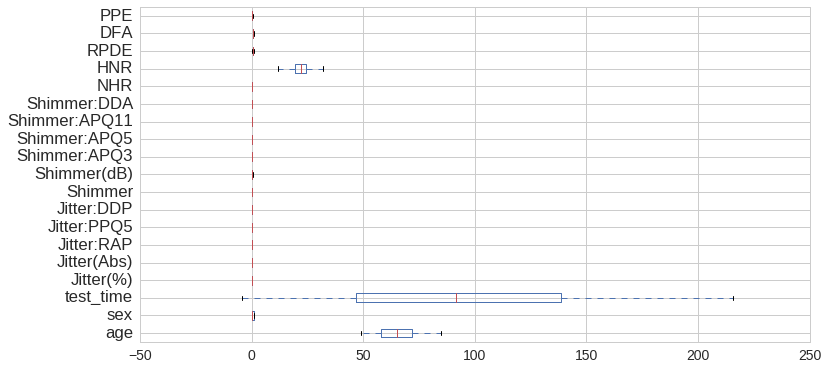

In [47]:
#solution!!
plt.figure(figsize=(12,6))
data.boxplot(vert=False)
plt.show()

To scale the feature values to the same range we can use the MinMaxScaler module in the sklearn package. Scikit-learn accepts pandas DataFrame as input, but returns a numpy array. Therefor we convert the returned numpy array back to a pandas DataFrame. To do this you can use the following code:

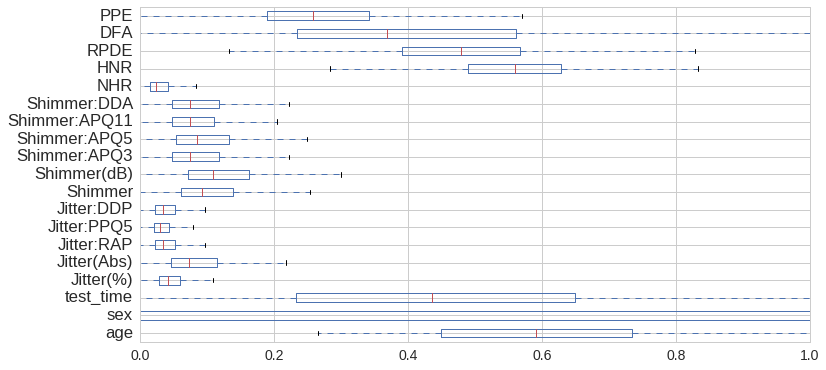

In [48]:
from sklearn.preprocessing import MinMaxScaler

data_norm = pd.DataFrame(MinMaxScaler().fit_transform(data),columns=data.columns.values)

plt.figure(figsize=(12,6))
data_norm.boxplot(vert=False)
plt.show()

Now train a linear model on this data using the "LinearRegression" module in scikit-learn. What is the $R^2$ performance of the regression model on the data set?

In [49]:
# solution!!
from sklearn import metrics
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data_norm,target)

print "R-squared = %f" % metrics.r2_score(target,model.predict(data_norm))

R-squared = 0.156822


Are you satisfied with the performance? Maybe we should assume a non-linear relationship between the features and the target. To add polynomial features of degree $d$ we can use the "PolynomialFEatures" module in sklearn as follows:

In [50]:
from sklearn.preprocessing import PolynomialFeatures

d=2

polynomial_features = PolynomialFeatures(degree=d)
data_norm_poly=pd.DataFrame(polynomial_features.fit_transform(data_norm))

How many features are there now?

In [51]:
# solution!!
data_norm_poly.shape[1]

210

Now investigate the first 100 features using a boxplot. What do you see?

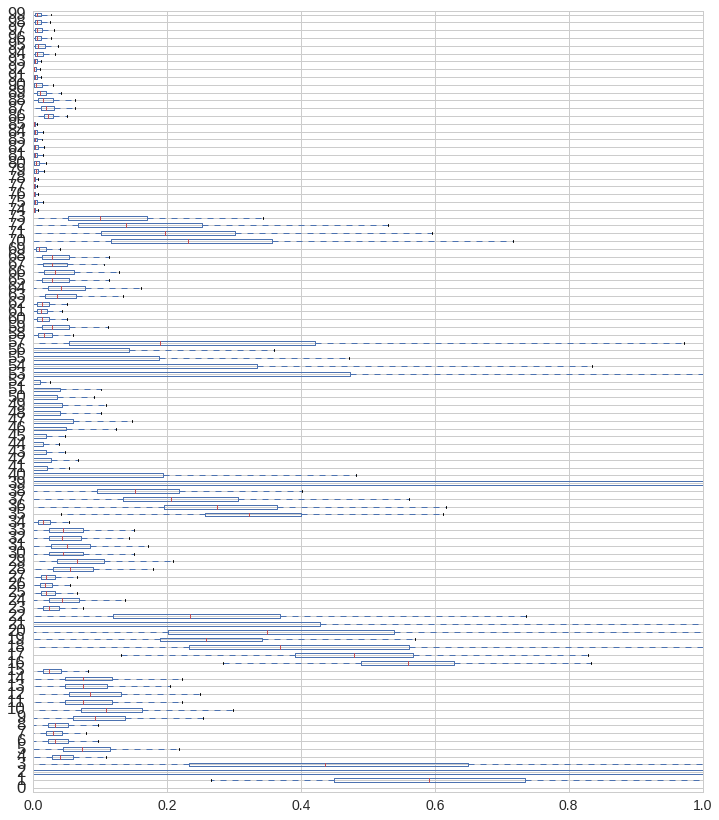

In [52]:
# solution!!
plt.figure(figsize=(12,14))
data_norm_poly.iloc[:,:100].boxplot(vert=False)
plt.show()

Perform the appropriate action!

In [53]:
#solution !!!
data_norm_poly_norm = pd.DataFrame(MinMaxScaler().fit_transform(data_norm_poly),columns=data_norm_poly.columns.values)

Again train a linear model on this data using the "LinearRegression" module in scikit-learn. What is the $R^2$ performance now?

In [54]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data_norm_poly_norm,target)

print "R-squared = %f" % metrics.r2_score(target,model.predict(data_norm_poly_norm))

R-squared = 0.355588


We can investigate the predictions further by looking at the correlation between the target 'motor_UPDRS' and the predictions using a scatterplot:

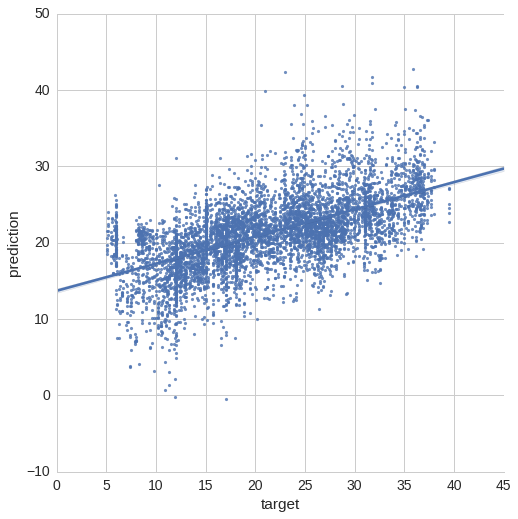

In [55]:
import seaborn as sns

tmp = pd.DataFrame()
tmp['target'] = target
tmp['prediction'] = model.predict(data_norm_poly_norm)

sns.lmplot(x="target", y="prediction", data=tmp, size=7.5, scatter_kws={"s": 10})
plt.show()

What happens when you set $d=3$ for the polynomial features?

In [56]:
# solution: set variable d correctly in the notebook and re-run.

Now we will split the data set into a train and a test at random by creating a list "folds" that contains random values zero and one. 

In [57]:
np.random.seed(1234)

folds = np.random.randint(2,size=len(data_norm_poly_norm))

For the data set with $d=3$ what is the $R^2$ performance on the train set?

In [58]:
d=3

polynomial_features = PolynomialFeatures(degree=d)
data_norm_poly=pd.DataFrame(polynomial_features.fit_transform(data_norm))

data_norm_poly_norm = pd.DataFrame(MinMaxScaler().fit_transform(data_norm_poly),columns=data_norm_poly.columns.values)

model.fit(data_norm_poly_norm[folds==0],target[folds==0])

print "R-squared = %f" % metrics.r2_score(target[folds==0],model.predict(data_norm_poly_norm[folds==0]))

R-squared = 0.812196


what is the $R^2$ performance on the test set?

In [59]:
print "R-squared = %f" % metrics.r2_score(target[folds==1],model.predict(data_norm_poly_norm[folds==1]))

R-squared = -616.087740


What is the $R^2$ performance on the train and test set for $d=2$?

In [60]:
d=2

polynomial_features = PolynomialFeatures(degree=d)
data_norm_poly=pd.DataFrame(polynomial_features.fit_transform(data_norm))

data_norm_poly_norm = pd.DataFrame(MinMaxScaler().fit_transform(data_norm_poly),columns=data_norm_poly.columns.values)

model.fit(data_norm_poly_norm[folds==0],target[folds==0])

print "R-squared train = %f" % metrics.r2_score(target[folds==0],model.predict(data_norm_poly_norm[folds==0]))
print "R-squared test = %f" % metrics.r2_score(target[folds==1],model.predict(data_norm_poly_norm[folds==1]))

R-squared train = 0.379768
R-squared test = 0.233292
